# Import packages

In [1]:
#Import packages
import pandas as pd
import seaborn as sns
sns.set_style()
sns.set_context()
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import datetime
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_log_error


# Load data set


In [2]:
cd C:\Users\Radi Radev\Documents\TU Wien Master\Data Science\ML\Bike-Sharing-Dataset

C:\Users\Radi Radev\Documents\TU Wien Master\Data Science\ML\Bike-Sharing-Dataset


In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4241-80C5

 Directory of C:\Users\Radi Radev\Documents\TU Wien Master\Data Science\ML\Bike-Sharing-Dataset

20.11.2019 ?.  16:33    <DIR>          .
20.11.2019 ?.  16:33    <DIR>          ..
22.11.2019 ?.  17:20           877 475 bike_sharing.ipynb
20.12.2013 ?.  12:10            57 569 day.csv
20.12.2013 ?.  12:10         1 156 736 hour.csv
20.12.2013 ?.  13:29             5 607 Readme.txt
               4 File(s)      2 097 387 bytes
               2 Dir(s)  232 114 180 096 bytes free


In [4]:
data = pd.read_csv("hour.csv")


# Data attribute exploration

Exploring the data structure, the variables and their attributes.

In [5]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
data.tail(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17359,17360,2012-12-31,1,1,12,4,0,1,1,1,0.14,0.1667,0.69,0.1045,0,3,3
17360,17361,2012-12-31,1,1,12,5,0,1,1,1,0.16,0.1515,0.64,0.1940,0,9,9
17361,17362,2012-12-31,1,1,12,6,0,1,1,1,0.16,0.1667,0.64,0.1642,0,40,40
17362,17363,2012-12-31,1,1,12,7,0,1,1,1,0.16,0.1818,0.64,0.1343,2,83,85
17363,17364,2012-12-31,1,1,12,8,0,1,1,1,0.14,0.1515,0.69,0.1343,9,187,196
17364,17365,2012-12-31,1,1,12,9,0,1,1,2,0.18,0.2121,0.64,0.1045,13,144,157
17365,17366,2012-12-31,1,1,12,10,0,1,1,2,0.20,0.2121,0.69,0.1343,33,87,120
17366,17367,2012-12-31,1,1,12,11,0,1,1,2,0.22,0.2273,0.60,0.1940,43,114,157
17367,17368,2012-12-31,1,1,12,12,0,1,1,2,0.24,0.2273,0.56,0.1940,52,172,224
17368,17369,2012-12-31,1,1,12,13,0,1,1,2,0.26,0.2576,0.44,0.1642,38,165,203


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We conclude there are no missing values, some of our variables are categorical and are encoded as object, others are floating numerical or integer.
Below we want to see some basic features of the data we have like mean, minimum, maximum, number of samples and so on.

In [9]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
data.mean()

instant       8690.000000
season           2.501640
yr               0.502561
mnth             6.537775
hr              11.546752
holiday          0.028770
weekday          3.003683
workingday       0.682721
weathersit       1.425283
temp             0.496987
atemp            0.475775
hum              0.627229
windspeed        0.190098
casual          35.676218
registered     153.786869
cnt            189.463088
dtype: float64

##### Explore dependent variable 'cnt' - total count of bike rentals

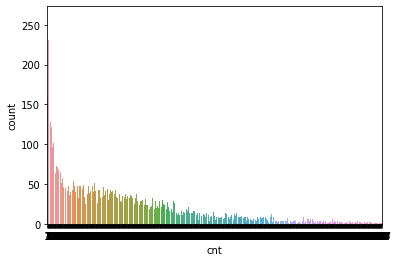

In [11]:
sns.countplot(data['cnt'])

In [12]:
data['cnt'].mean()

189.46308763450142

In [13]:
data['cnt'].value_counts()

5      260
6      236
4      231
3      224
2      208
      ... 
725      1
709      1
661      1
629      1
887      1
Name: cnt, Length: 869, dtype: int64

Exploring potential dependant variable 'casual'

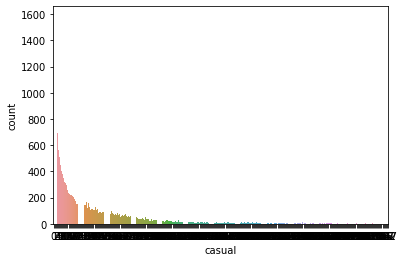

In [14]:
sns.countplot(data['casual'])

In [15]:
data['casual'].mean()

35.67621842453536

In [16]:
data['casual'].value_counts()

0      1581
1      1082
2       798
3       697
4       561
       ... 
290       1
312       1
281       1
297       1
367       1
Name: casual, Length: 322, dtype: int64

Exploring 'registered' as dependant variable

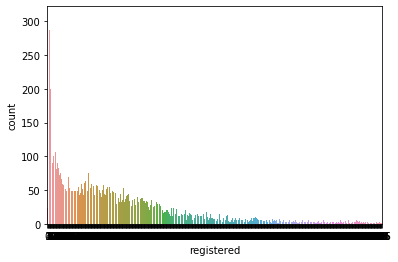

In [17]:
sns.countplot(data['registered'])

In [18]:
data['registered'].mean()

153.78686920996606

In [19]:
data['registered'].value_counts()

4      307
3      294
5      287
6      266
2      245
      ... 
822      1
806      1
790      1
614      1
791      1
Name: registered, Length: 776, dtype: int64

##### We explore relations between the variables in order to determine the best dependant variable, we observe 'cnt', 'casual', 'registered'. We also look for correlations and do visual data exploration in order to build our hypothesis, which are going to be the best predictors and dependant variables.

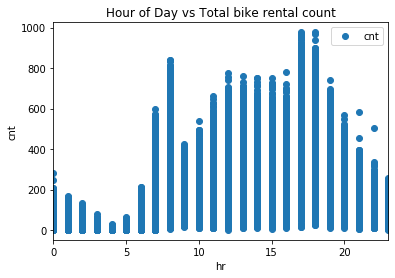

In [20]:
data.plot(x='hr', y='cnt', style='o')
plt.title('Hour of Day vs Total bike rental count')
plt.xlabel('hr')
plt.ylabel('cnt')
plt.show()

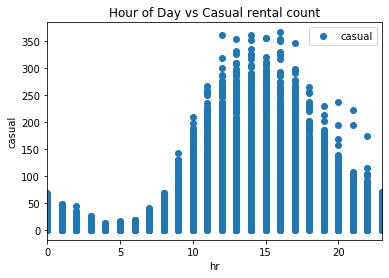

In [21]:
data.plot(x='hr', y='casual', style='o')
plt.title('Hour of Day vs Casual rental count')
plt.xlabel('hr')
plt.ylabel('casual')
plt.show()

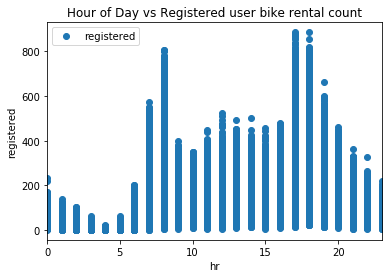

In [22]:
data.plot(x='hr', y='registered', style='o')
plt.title('Hour of Day vs Registered user bike rental count')
plt.xlabel('hr')
plt.ylabel('registered')
plt.show()

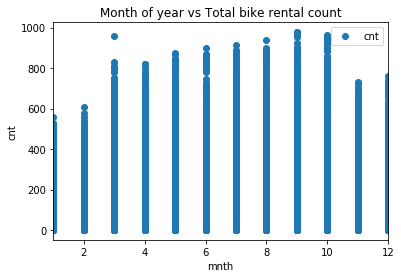

In [23]:
data.plot(x='mnth', y='cnt', style='o')
plt.title('Month of year vs Total bike rental count')
plt.xlabel('mnth')
plt.ylabel('cnt')
plt.show()

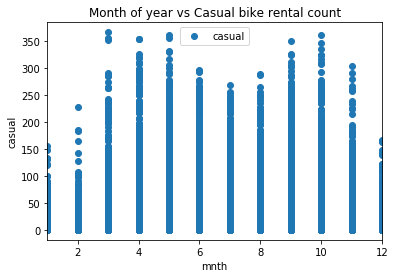

In [24]:
data.plot(x='mnth', y='casual', style='o')
plt.title('Month of year vs Casual bike rental count')
plt.xlabel('mnth')
plt.ylabel('casual')
plt.show()

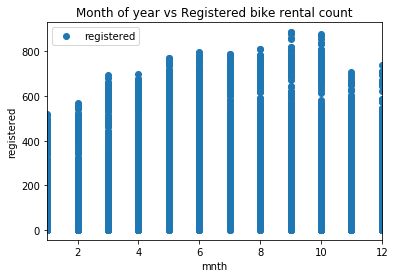

In [25]:
data.plot(x='mnth', y='registered', style='o')
plt.title('Month of year vs Registered bike rental count')
plt.xlabel('mnth')
plt.ylabel('registered')
plt.show()

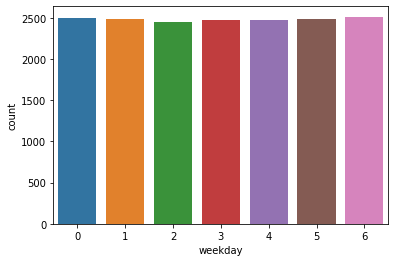

In [26]:
sns.countplot(data['weekday'])

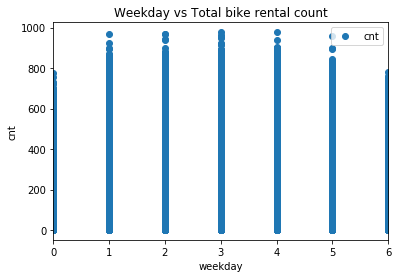

In [27]:
data.plot(x='weekday', y='cnt', style='o')
plt.title('Weekday vs Total bike rental count')
plt.xlabel('weekday')
plt.ylabel('cnt')
plt.show()

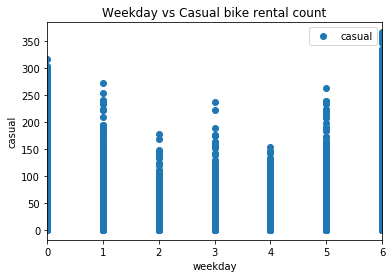

In [28]:
data.plot(x='weekday', y='casual', style='o')
plt.title('Weekday vs Casual bike rental count')
plt.xlabel('weekday')
plt.ylabel('casual')
plt.show()

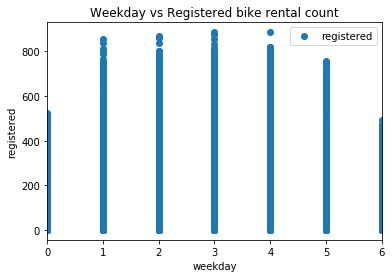

In [29]:
data.plot(x='weekday', y='registered', style='o')
plt.title('Weekday vs Registered bike rental count')
plt.xlabel('weekday')
plt.ylabel('registered')
plt.show()

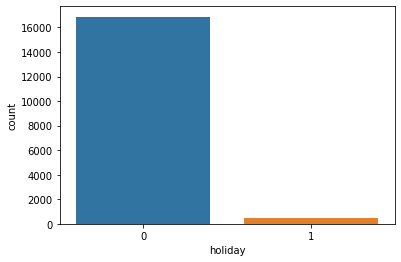

In [30]:
sns.countplot(data['holiday'])

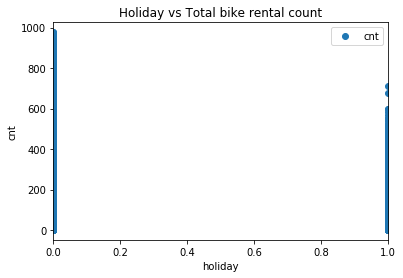

In [31]:
data.plot(x='holiday', y='cnt', style='o')
plt.title('Holiday vs Total bike rental count')
plt.xlabel('holiday')
plt.ylabel('cnt')
plt.show()

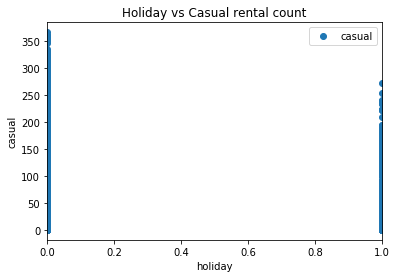

In [32]:
data.plot(x='holiday', y='casual', style='o')
plt.title('Holiday vs Casual rental count')
plt.xlabel('holiday')
plt.ylabel('casual')
plt.show()

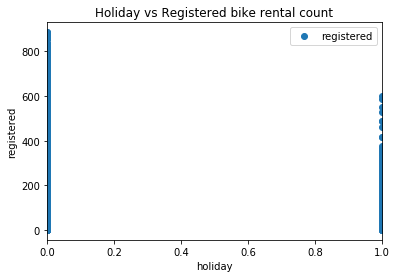

In [33]:
data.plot(x='holiday', y='registered', style='o')
plt.title('Holiday vs Registered bike rental count')
plt.xlabel('holiday')
plt.ylabel('registered')
plt.show()

From the plots above we see a very important information - the registered users use the bikes more during the work week as during the weekend. The casual users have a reversed usage pattern - they mainly use the bikes during the weekend.

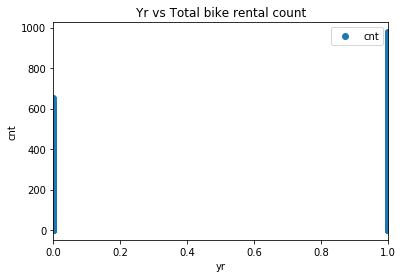

In [34]:
data.plot(x='yr', y='cnt', style='o')
plt.title('Yr vs Total bike rental count')
plt.xlabel('yr')
plt.ylabel('cnt')
plt.show()

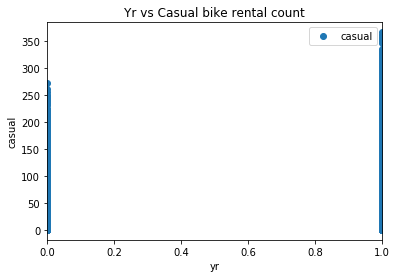

In [35]:
data.plot(x='yr', y='casual', style='o')
plt.title('Yr vs Casual bike rental count')
plt.xlabel('yr')
plt.ylabel('casual')
plt.show()

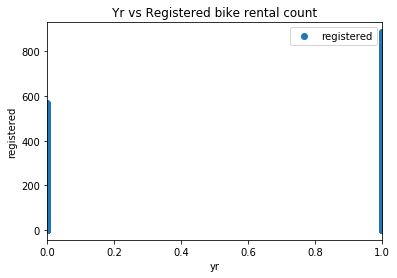

In [36]:
data.plot(x='yr', y='registered', style='o')
plt.title('Yr vs Registered bike rental count')
plt.xlabel('yr')
plt.ylabel('registered')
plt.show()

Since the data was spanning over two years we can just see here the influence of increasing use of the bike rental service, but has limited prediction capability other than the general trend.

From the plots above we see that the hour of the day, the month and holiday have impact on the total number of rentals. We chose 'cnt' as our main focus under the premise that it is our top priority. Later we would also find that statistically this is a logical choise due to the very strong correlation between the number of registered users renting bikes and the number of casual users. Although the patterns of use will differ, our prediction accuracy will remain the same. 

Windspeed and humidity against total count of rentals

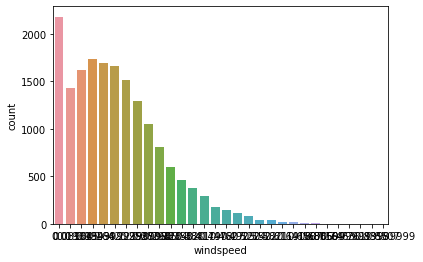

In [37]:
sns.countplot(data['windspeed'])

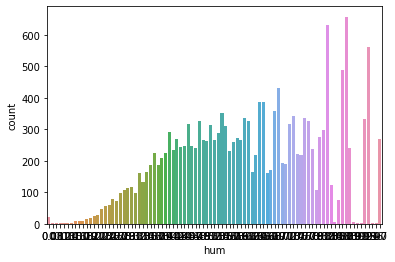

In [38]:
sns.countplot(data['hum'])

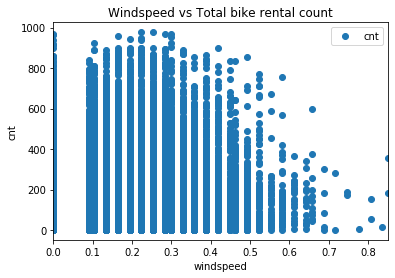

In [39]:
data.plot(x='windspeed', y='cnt', style='o')
plt.title('Windspeed vs Total bike rental count')
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.show()

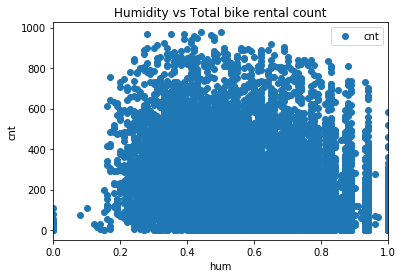

In [40]:
data.plot(x='hum', y='cnt', style='o')
plt.title('Humidity vs Total bike rental count')
plt.xlabel('hum')
plt.ylabel('cnt')
plt.show()

Temperature relations

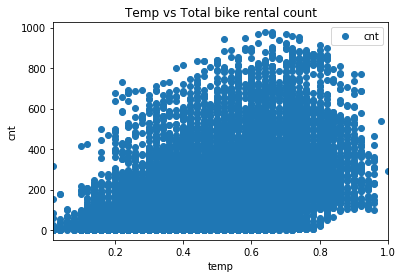

In [41]:
data.plot(x='temp', y='cnt', style='o')
plt.title('Temp vs Total bike rental count')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

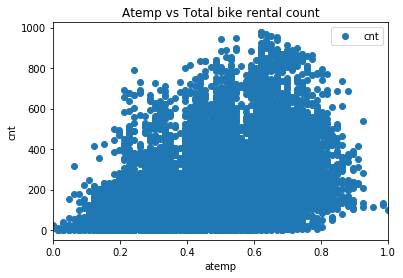

In [42]:
data.plot(x='atemp', y='cnt', style='o')
plt.title('Atemp vs Total bike rental count')
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.show()

From the plots above we already can see that some variables like 'temp' and 'atemp' are heavaly correlated and might have lower impact on the prediction of the total number of bike rentals.

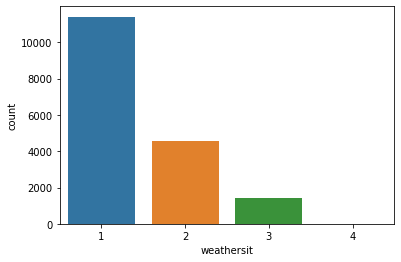

In [43]:
sns.countplot(data['weathersit'])

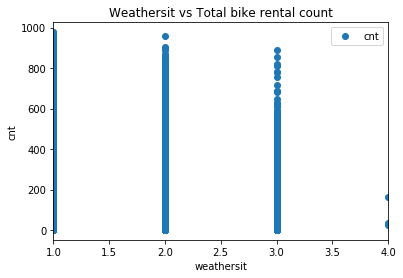

In [44]:
data.plot(x='weathersit', y='cnt', style='o')
plt.title('Weathersit vs Total bike rental count')
plt.xlabel('weathersit')
plt.ylabel('cnt')
plt.show()

Above we see that the weather has implications on the number of rentals, but there are other factors that contribute to a prediction model.

Below we see how seasonal changes look like

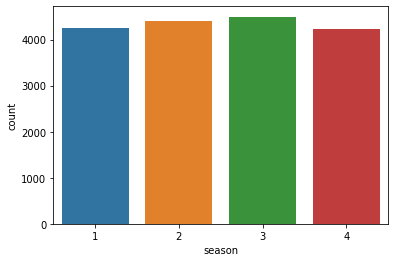

In [45]:
sns.countplot(data['season'])

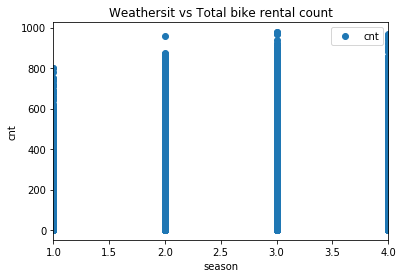

In [46]:
data.plot(x='season', y='cnt', style='o')
plt.title('Weathersit vs Total bike rental count')
plt.xlabel('season')
plt.ylabel('cnt')
plt.show()

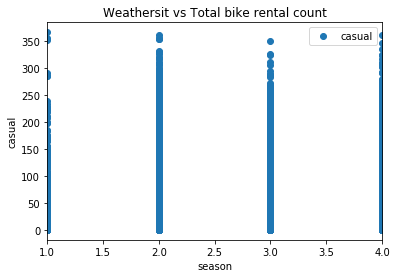

In [47]:
data.plot(x='season', y='casual', style='o')
plt.title('Weathersit vs Total bike rental count')
plt.xlabel('season')
plt.ylabel('casual')
plt.show()

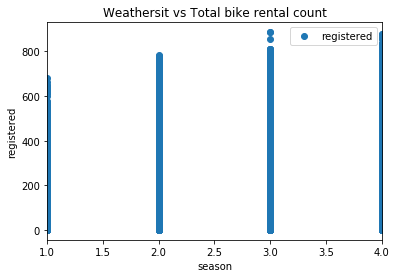

In [48]:
data.plot(x='season', y='registered', style='o')
plt.title('Weathersit vs Total bike rental count')
plt.xlabel('season')
plt.ylabel('registered')
plt.show()

We see that there is a reduction in rentals during winter time especially from the registered user, but we see also that the casual user is still active.

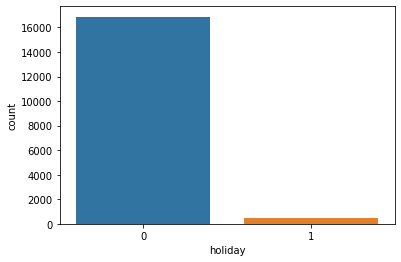

In [49]:
sns.countplot(data['holiday'])

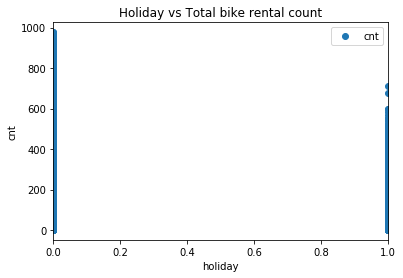

In [50]:
data.plot(x='holiday', y='cnt', style='o')
plt.title('Holiday vs Total bike rental count')
plt.xlabel('holiday')
plt.ylabel('cnt')
plt.show()

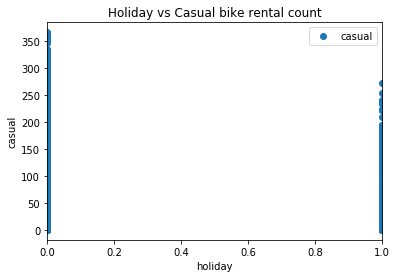

In [51]:
data.plot(x='holiday', y='casual', style='o')
plt.title('Holiday vs Casual bike rental count')
plt.xlabel('holiday')
plt.ylabel('casual')
plt.show()

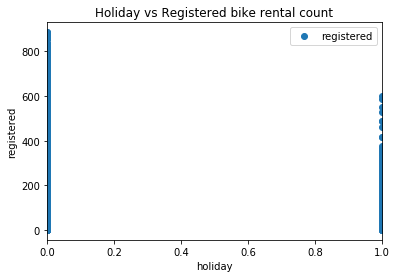

In [52]:
data.plot(x='holiday', y='registered', style='o')
plt.title('Holiday vs Registered bike rental count')
plt.xlabel('holiday')
plt.ylabel('registered')
plt.show()

Clearly registered users use the bikes less on Holidays than casual users (in relation to their workday use). The reverse corelation can be seen for workdays below.

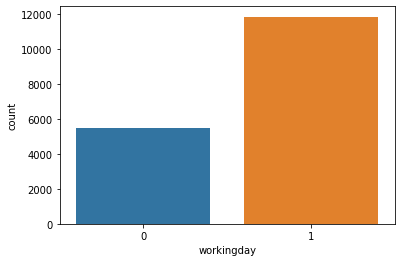

In [53]:
sns.countplot(data['workingday'])

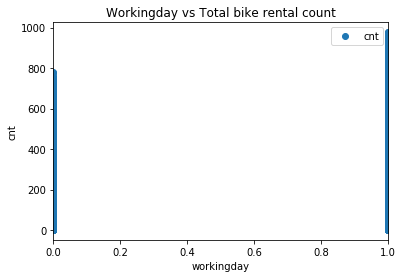

In [54]:
data.plot(x='workingday', y='cnt', style='o')
plt.title('Workingday vs Total bike rental count')
plt.xlabel('workingday')
plt.ylabel('cnt')
plt.show()

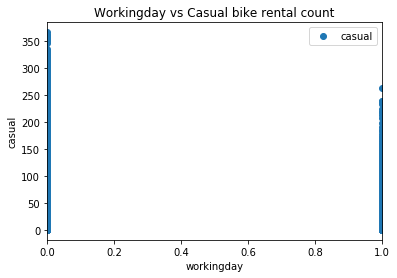

In [55]:
data.plot(x='workingday', y='casual', style='o')
plt.title('Workingday vs Casual bike rental count')
plt.xlabel('workingday')
plt.ylabel('casual')
plt.show()

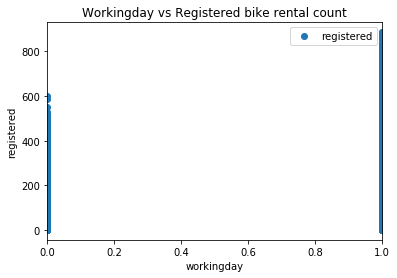

In [56]:
data.plot(x='workingday', y='registered', style='o')
plt.title('Workingday vs Registered bike rental count')
plt.xlabel('workingday')
plt.ylabel('registered')
plt.show()

##### Linear Regression Plot Temperature and Number of rentals

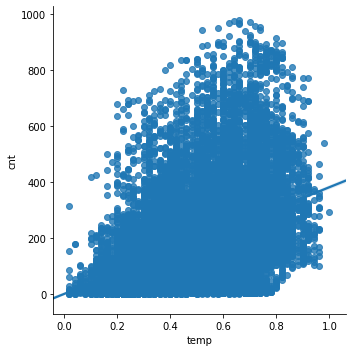

In [57]:

sns.lmplot(x="temp", y="cnt", data=data);

##### Time of day vs number of rentals regression plot

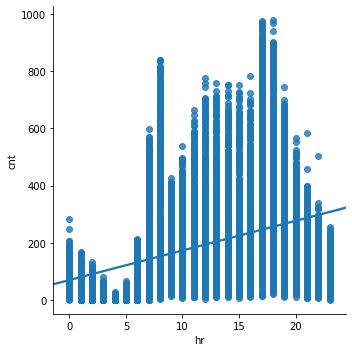

In [58]:
sns.lmplot(x="hr", y="cnt", data=data);

##### Weather Situation vs number of rentals regression plot

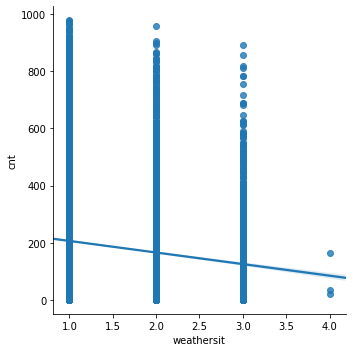

In [59]:
sns.lmplot(x="weathersit", y="cnt", data=data);

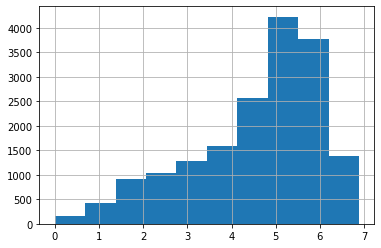

In [60]:
data["cnt"].apply(np.log).hist()

##### Heatmap Feature selection perform very well for our case.

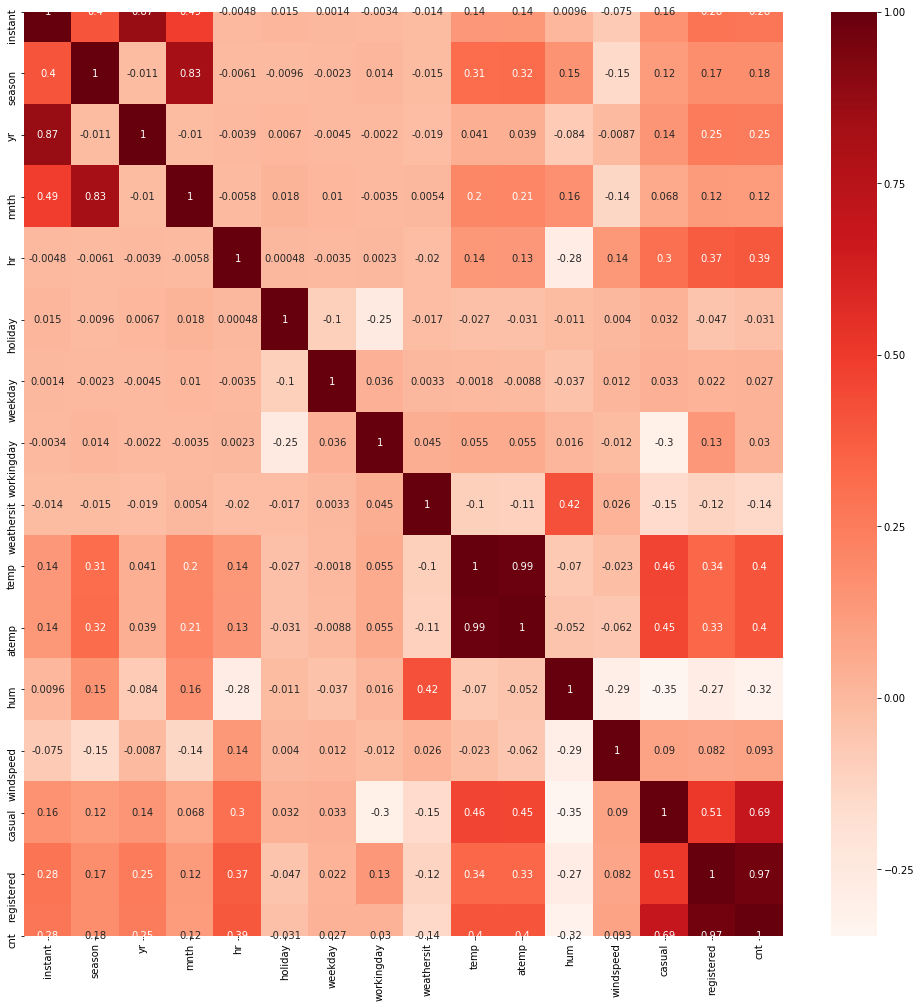

In [61]:

plt.figure(figsize=(17,17))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

We observe the correlation coefficients and decide which variable to trim from the data set.

In [62]:
cor_target = abs(cor['cnt'])

In [63]:
relevant_features = cor_target[cor_target>0.5]
relevant_features

casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [64]:
relevant_features = cor_target[cor_target> 0.3]
relevant_features

hr            0.394071
temp          0.404772
atemp         0.400929
hum           0.322911
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [65]:
print(data[['casual','registered']].corr())


              casual  registered
casual      1.000000    0.506618
registered  0.506618    1.000000


In [66]:
print(data[['atemp','temp']].corr())

          atemp      temp
atemp  1.000000  0.987672
temp   0.987672  1.000000


In [67]:
print(data[['hum','temp', 'hr']].corr())

           hum      temp        hr
hum   1.000000 -0.069881 -0.276498
temp -0.069881  1.000000  0.137603
hr   -0.276498  0.137603  1.000000


Above we see once more confirmation to what we already saw in the graphical exploration of the data - we can select 'cnt' as our dependant variable due to the high correlation to the 'casual' and 'registered' variables. Same for the rest of the correlated indipendant variables like 'temp' and 'atempt'.

##### How to deal with Time ?

We see that our data set is ordered time series - we have each entry correspond to a date of the year. Usually we should consider this. The way forward would be to extract the week number out of the date data and then one hot encode it, but this will increase the number of variables significantly and will have not a significant improvement on our models, so our choise is to ommit this step.

##### Trim the data set of unwanted variables

From above we see that 'cnt' is strongly corelated to casual and registered, so we can drop casual and registered.
Temp and atemp are also both strongly corelated, so we can use only temp.

In [68]:
data.loc[1400]

instant             1401
dteday        2011-03-03
season                 1
yr                     0
mnth                   3
hr                    15
holiday                0
weekday                4
workingday             1
weathersit             1
temp                0.24
atemp             0.2879
hum                 0.23
windspeed              0
casual                 6
registered            62
cnt                   68
Name: 1400, dtype: object

Tested to exclude some minor contributing variables, but the results actually are worse. So this is the final set.

In [69]:
#trim
X=data.drop(['instant','dteday','yr','atemp','casual','registered','cnt'], axis=1)
y=data['cnt']

In [70]:
X.loc[1400]

season         1.00
mnth           3.00
hr            15.00
holiday        0.00
weekday        4.00
workingday     1.00
weathersit     1.00
temp           0.24
hum            0.23
windspeed      0.00
Name: 1400, dtype: float64

In [71]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

One Hot encoding of categorical attributes required!!
- season
- mnth
- hr
- weekday
- weathersit

In [72]:
onehotencoder = OneHotEncoder(categorical_features = [0,1,2,4,6]) 
X = onehotencoder.fit_transform(X).toarray()


C:\Users\Radi Radev\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Radi Radev\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Train and test split

In [73]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [74]:
X_train.shape, X_test.shape, data.shape

((13034, 56), (4345, 56), (17379, 17))

We need to make sure our values are in range thus perform standard scaling (normalization).

In [75]:
#scaling
sc = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

##### Model list 

In [76]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RandomForest', RandomForestRegressor(n_estimators=10)))
models.append(('GradienBoost', GradientBoostingRegressor()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('SVR', SVR(gamma='scale')))
names = []

K-fold cross validation

In [77]:
for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=2)
    results = model_selection.cross_val_score(model,X_train_scaled,y_train, cv= kfold, scoring = 'neg_mean_absolute_error')
    names.append(name)
    msg  = "%s: %f" % (name, -1*(results).mean())
    print(msg)

LinearRegression: 79.670815
DecisionTree: 61.813933
RandomForest: 49.535101
GradienBoost: 66.522643
Ridge: 79.654371
Lasso: 79.517253
SVR: 90.827920


From the quick run we established that all models except for Random Forest, provide rather bad results. We try to optimize the Random Forest by changing the number of nodes parameter.

In [78]:
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

In [79]:
mean_absolute_error(y_pred,y_test)

50.033354430379745

Root Mean Squared Logarithmic Error :

In [80]:
np.sqrt(mean_squared_log_error( y_test,y_pred))

0.48471558044031626

In [81]:
def get_mae(n_estimator, training_data, test_data, target_training, target_test):
    
    #fitting model with new estimator and training sets
    # fitting model with different input nodes
    model = RandomForestRegressor(n_estimators=n_estimator, random_state=0)
    # fitting the model with the training datasets
    model.fit(training_data, target_training)

    #prediction with new estiamted model
    # making prediction with the test dataset
    prediction_val = model.predict(test_data)

    # return results for MAE for the new estimator turning
    mae = mean_absolute_error(target_test, prediction_val)
    return(mae)

In [82]:
mae_plot = {}
for estimator in range(1,60):
    mae = get_mae(estimator,X_train_scaled,X_test_scaled,y_train,y_test)
    mae_plot[estimator] = mae

mae_plot

{1: 68.41334867663981,
 2: 59.564606827771385,
 3: 56.76358777649917,
 4: 54.71152857690832,
 5: 53.631018028385114,
 6: 52.62974811405191,
 7: 51.944981094854505,
 8: 51.6150920598389,
 9: 51.36564633678558,
 10: 51.1484660529344,
 11: 51.08775360044635,
 12: 50.73030654647743,
 13: 50.45534537192765,
 14: 50.37160693736643,
 15: 50.04106866129651,
 16: 49.93877037782892,
 17: 49.9088221755906,
 18: 49.749030175169416,
 19: 49.73224496800113,
 20: 49.67971020329881,
 21: 49.67157122764718,
 22: 49.58611099487394,
 23: 49.562128883774456,
 24: 49.479754986574605,
 25: 49.36565109321058,
 26: 49.361017821840605,
 27: 49.42458494935288,
 28: 49.42750849361609,
 29: 49.387251960901025,
 30: 49.363202403784676,
 31: 49.30324882141134,
 32: 49.27825997314921,
 33: 49.255088979553875,
 34: 49.22916536925472,
 35: 49.22234818346211,
 36: 49.23080978561991,
 37: 49.2530525922931,
 38: 49.23423778087336,
 39: 49.19513145082765,
 40: 49.19123705408515,
 41: 49.17262529587321,
 42: 49.13741757539

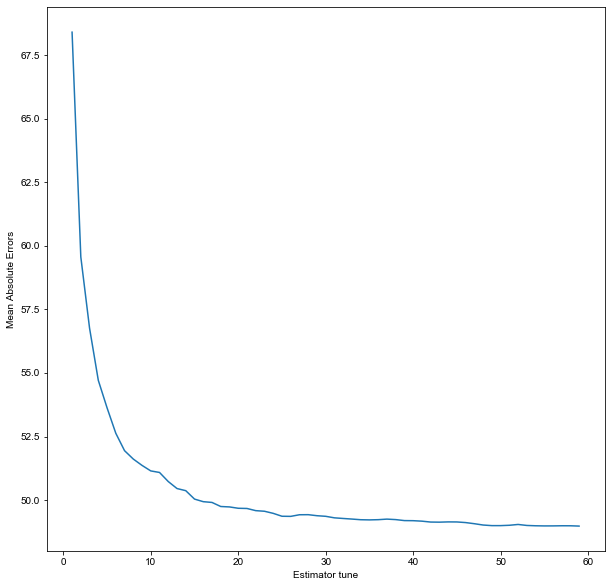

In [83]:
# convert to pandas dataframe
estimator_axis = list(mae_plot.keys())
mae_axis = list(mae_plot.values())

d = {'mae': mae_axis, 'estimator_tune': estimator_axis}
plot_data = pd.DataFrame(d)

# plot with seaborn
fig, ax = plt.subplots(figsize = (10,10))
sns.set_style("darkgrid")
sns.lineplot(y='mae', x='estimator_tune', data=plot_data)
ax.set(xlabel='Estimator tune', ylabel='Mean Absolute Errors')
plt.show()

We see that our best reults are with 48 variables. Usually the approach would be to reduce the number of variables and sacrifice little of the accuracy of the model. So we can select the option with 25 variables and compare against the version with 48 to see the difference.

In [84]:
model = RandomForestRegressor(n_estimators=48)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
mean_absolute_error(y_pred,y_test)

48.981395681498526

In [85]:
model = RandomForestRegressor(n_estimators=25)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
mean_absolute_error(y_pred,y_test)

49.79531799002685